# LAPTOP PRICE PREDICTOR USING MACHINE LEARNING TECHNIQUES

## Problem Statement:  
The objective of this project is to create end to end machine learning model to predict prices of laptop based on given set of features. If a user who is not aware of  price of laptops, but knows the features by selecting the  desired features and configurations, we can predict the price using our website.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# laptop dataset
url=('https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv')


## data preprocessing
 This is basically a Regression problem

In [3]:
df = pd.read_csv(url)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.shape

(1303, 12)

In [5]:
# we have few unnecessary columns here
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# check for null(missing) values- fortunately there are no null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

## further clean up the data we need to follow these steps
 1. As Unnamed column have no significance with the problem it can be removed
 2. Ram has object data type because of word 'GB', inorder to makw it as integer data type we are removeing 'GB'
 3. Same in the case of Weight (kg) is been removed and make it as float data type


In [9]:
df.drop(columns=['Unnamed: 0'], inplace= True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
# but still the datatype of RAM and Weight ae object
df['Ram'].dtype, df['Weight'].dtype

(dtype('O'), dtype('O'))

In [12]:
# we need to replace it
df['Ram']=df['Ram'].astype('int64')
df['Weight']=df['Weight'].astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## EDA

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

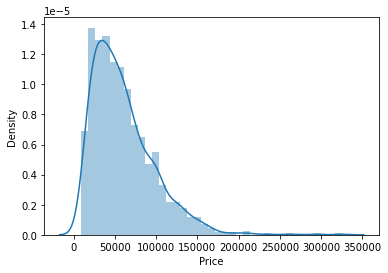

In [14]:
# check for Price
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['Price'])
# as our data is left skewed

<AxesSubplot:>

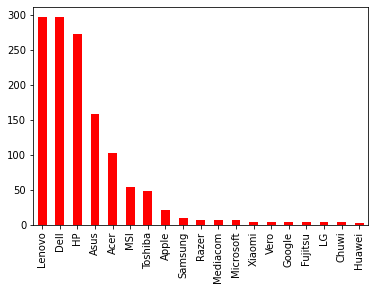

In [15]:
# check for company
df['Company'].value_counts().plot(kind='bar',color='red')


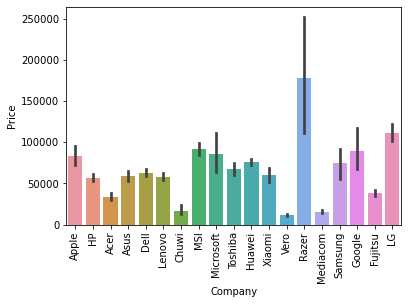

In [16]:
# check the price of each brands
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

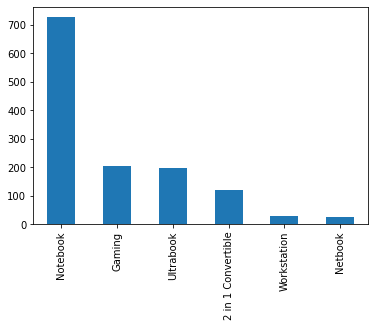

In [17]:
# check for typename
df['TypeName'].value_counts().plot(kind='bar')

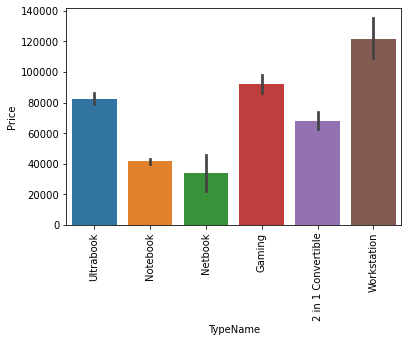

In [18]:
# check the price of each typename
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

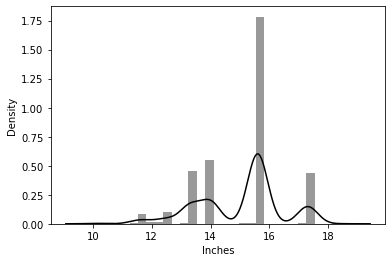

In [19]:
# check for size column
sns.distplot(df['Inches'], color='black')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

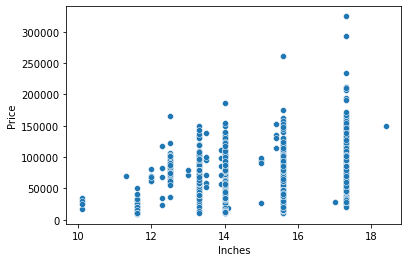

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

## Feature engineering

In [21]:
# check for screenresoluation
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [22]:
# segrigate touchscreen, ips panel etc
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [24]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
865,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,48484.8000,0
1155,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,25515.2592,0
1006,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,64202.4000,0
1232,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24988.8528,1
718,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4,32GB HDD,Intel HD Graphics 400,Windows 10,1.40,14119.2000,0
939,Dell,Gaming,17.3,2560x1440,Intel Core i7 6820HK 2.7GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.36,146946.2400,0
1081,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,172627.2000,0


<AxesSubplot:>

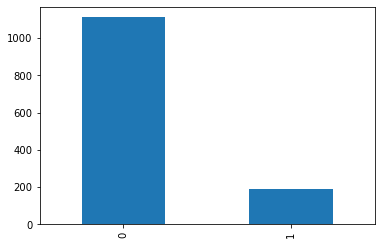

In [25]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

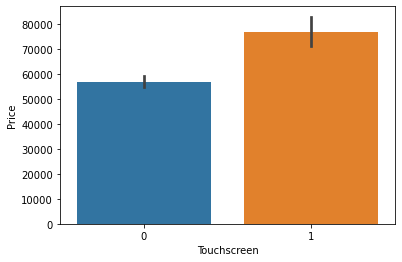

In [26]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [27]:
# ips panel 
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
76,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,27652.32,0,0
586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78,79813.44,0,1
869,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731.84,0,0
731,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.72,0,0
806,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,41558.40,0,0


<AxesSubplot:>

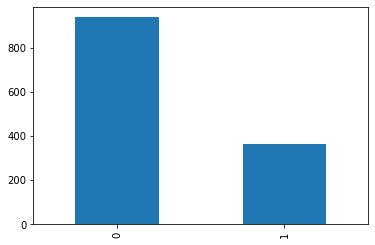

In [30]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

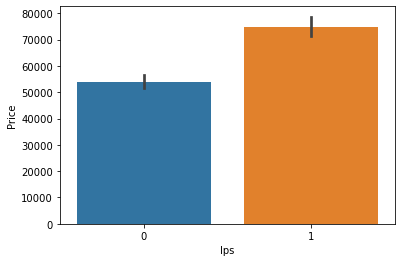

In [31]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [32]:
# spliting Screenresoluation - 1920x1080
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [33]:
df['ScreenResolution'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [34]:
new= df['ScreenResolution'].str.split('x',n=1,expand=True)

In [35]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [37]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,29783.5200,0,0,Full HD 1920,1080
772,Toshiba,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.75,54345.6000,0,1,IPS Panel 1366,768
170,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,71874.7200,0,1,IPS Panel Full HD 2160,1440
448,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,54757.9872,0,0,Full HD 1920,1080
962,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.5200,0,0,Full HD 1920,1080


In [38]:
# as Y_res is ok, there is problem with X_res
# we need to write a reg expression
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_res, Length: 1303, dtype: object

In [39]:
# values are in list so,
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [42]:
# as data type of X_res, Y_res are object, we need to change to integer
df['X_res']=df['X_res'].astype('int64')
df['Y_res']=df['Y_res'].astype('int64')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [44]:
# check the correlation
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [45]:
# lets make a new column called PPI(Picels per inches)
df['ppi']=(((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float64')

In [46]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [47]:
# Now lets drop bewlow columns
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [49]:
# lets target Cpu column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
                                        ... 
Intel Pentium Dual Core 4405U 2.1GHz       1
AMD A6-Series 9220 2.9GHz                  1
Intel Celeron Dual Core N3060 1.60GHz      1
Intel Core i5 7500U 2.7GHz                 1
Intel Core i3 6006U 2.2GHz                 1
Name: Cpu, Length: 118, dtype: int64

In [50]:
# Cpu split into 5 columns
df['Cpu components']=df['Cpu'].apply(lambda x:x.split()[0:3])

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu components
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,"[Intel, Core, i5]"


In [52]:
df['Cpu components']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [53]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu components
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [54]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [55]:
df['Cpu brand'] = df['Cpu components'].apply(fetch_processor)

In [56]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu components,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

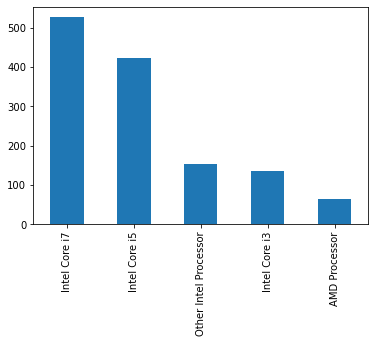

In [57]:
df['Cpu brand'].value_counts().plot(kind='bar')

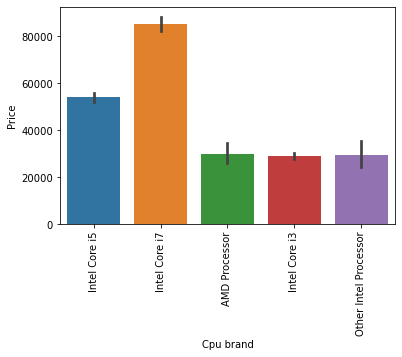

In [58]:
# check price vs processor
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
# now, we can drop cpu , cpu components
df.drop(columns=['Cpu','Cpu components'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

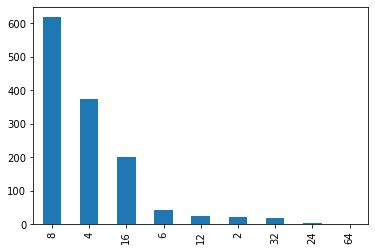

In [60]:
# check Ram
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

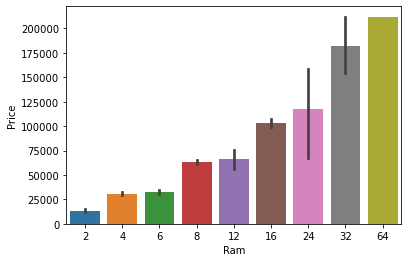

In [61]:
sns.barplot(x=df['Ram'], y=df['Price'])

In [62]:
# lets check memory
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
512GB SSD +  1.0TB Hybrid          1
6

In [63]:
# we can transform 4 columns from memory
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [64]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [65]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1280,HP,Notebook,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,1000,0
950,HP,Workstation,8,8 SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.7200,0,1,141.211998,Intel Core i7,0,8,0,0
939,Dell,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1080,Windows 10,4.36,146946.2400,0,0,169.780899,Intel Core i7,1000,512,0,0
115,HP,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.26,74538.1872,1,1,165.632118,Intel Core i5,0,256,0,0
269,Lenovo,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.05,46886.4000,0,0,141.211998,Intel Core i7,0,256,0,0


In [66]:
# drop memory column
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [67]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [68]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [69]:
# check Gpu
df['Gpu'].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Nvidia Quadro M3000M          1
Nvidia GeForce GTX 930MX      1
Intel Iris Graphics 550       1
AMD Radeon R5 520             1
AMD Radeon R5 430             1
Name: Gpu, Length: 110, dtype: int64

In [70]:
# split brand names from Gpu
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [71]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [72]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

<AxesSubplot:xlabel='Gpu brand', ylabel='Price'>

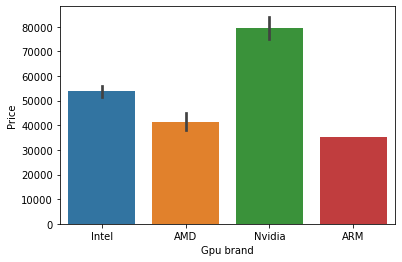

In [73]:
# check price vs Gpu brand
sns.barplot(x=df['Gpu brand'],y=df['Price'])

In [74]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [75]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

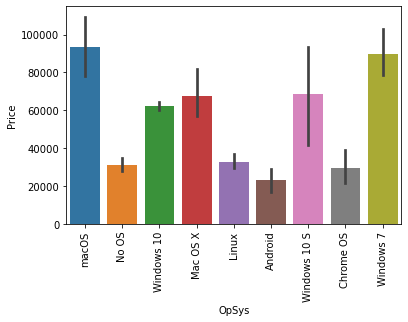

In [76]:
# check price vs OpSys brand
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [78]:
df['Os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [79]:
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


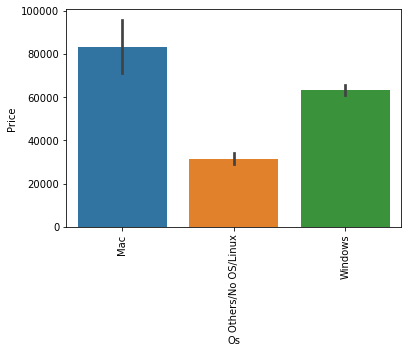

In [80]:
# check price vs OpSys brand
sns.barplot(x=df['Os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

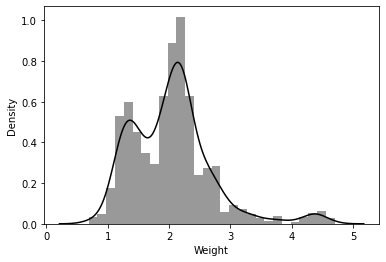

In [81]:
# check for weight
sns.distplot(df['Weight'],color='black')

<AxesSubplot:xlabel='Weight', ylabel='Price'>

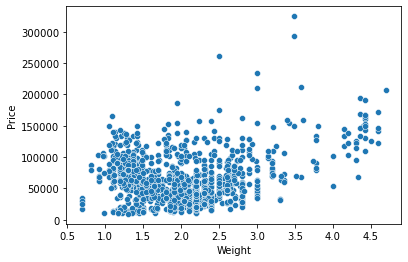

In [82]:
# it is slighlty linear
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [83]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

In [84]:
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383874,0.743007,0.116984,0.206623,0.303763,0.096288,0.603634
Weight,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.323240,0.514491,-0.062742
Price,0.743007,0.210370,1.000000,0.191226,0.252208,0.473487,-0.096441,0.670799
Touchscreen,0.116984,-0.294620,0.191226,1.000000,0.150512,0.460587,-0.209733,0.255092
Ips,0.206623,0.016967,0.252208,0.150512,1.000000,0.300879,-0.094461,0.223795
ppi,0.303763,-0.323240,0.473487,0.460587,0.300879,1.000000,-0.295411,0.506895
HDD,0.096288,0.514491,-0.096441,-0.209733,-0.094461,-0.295411,1.000000,-0.399896
SSD,0.603634,-0.062742,0.670799,0.255092,0.223795,0.506895,-0.399896,1.000000


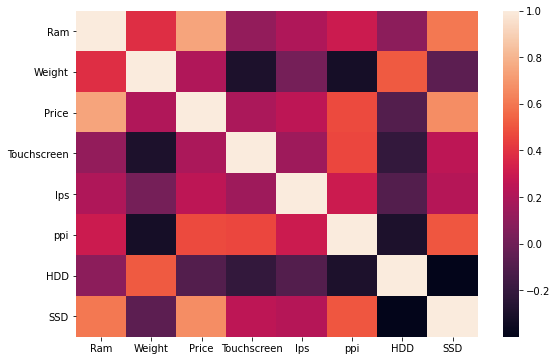

In [85]:
# heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df.corr())
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

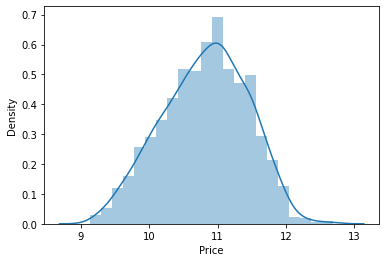

In [86]:
#finally, we need convert skewed to normal curve by using log transformation
sns.distplot(np.log(df['Price']))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

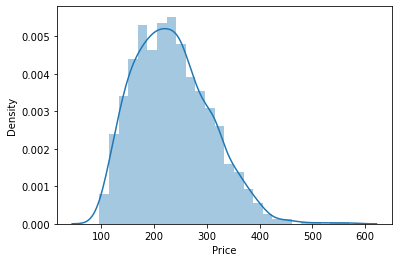

In [87]:
sns.distplot(np.sqrt(df['Price']))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

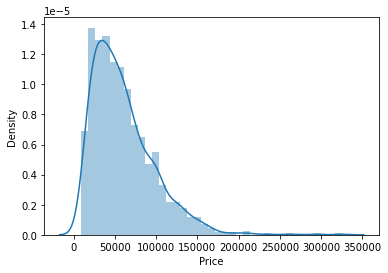

In [88]:
sns.distplot((df['Price']))

## Splitting the data

In [89]:
X=df.drop(columns=['Price'])
y= np.log(df['Price'])

In [90]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [91]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state= 42)

In [93]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
409,Lenovo,Notebook,2,1.15,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
432,Lenovo,Notebook,4,1.70,0,1,157.350512,Intel Core i3,0,128,Intel,Windows
471,HP,Notebook,8,1.90,0,0,141.211998,Intel Core i5,500,0,AMD,Windows
1156,MSI,Gaming,16,2.70,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
174,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i5,0,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia,Windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel,Windows
1294,HP,Notebook,6,2.04,0,0,141.211998,AMD Processor,0,0,AMD,Windows
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel,Windows


## Onehot encoding

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

## Machine Learning Models and Traning

In [95]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

## Linear Regression

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_L=r2_score(y_test,y_pred)
mean_absolute_error_L=mean_absolute_error(y_test,y_pred)
print("r2_score: {:.3f}".format(r2_score_L))
print("Mean_absolute_error: {:.3f}".format(mean_absolute_error_L))

r2_score: 0.830
Mean_absolute_error: 0.194


## Lasso Regression

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_LA=r2_score(y_test,y_pred)
mean_absolute_error_LA=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_LA))
print("MSE: {:.3f}".format(mean_absolute_error_LA))

R2_score: 0.823
MSE: 0.198


## Ridge Refression

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_RR=r2_score(y_test,y_pred)
mean_absolute_error_RR=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_RR))
print("MSE: {:.3f}".format(mean_absolute_error_RR))

R2_score: 0.821
MSE: 0.199


## KNN

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_KNN=r2_score(y_test,y_pred)
mean_absolute_error_KNN=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_KNN))
print("MSE: {:.3f}".format(mean_absolute_error_KNN))

R2_score: 0.773
MSE: 0.212


## SVM

In [100]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_SVR=r2_score(y_test,y_pred)
mean_absolute_error_SVR=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_SVR))
print("MSE: {:.3f}".format(mean_absolute_error_SVR))


R2_score: 0.845
MSE: 0.178


## Decision Tree

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf= 5,min_samples_split=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred)
mean_absolute_error_DT=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_DT))
print("MSE: {:.3f}".format(mean_absolute_error_DT))

R2_score: 0.814
MSE: 0.196


## Random Forest

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_RF=r2_score(y_test,y_pred)
mean_absolute_error_RF=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_RF))
print("MSE: {:.3f}".format(mean_absolute_error_RF))

R2_score: 0.865
MSE: 0.162


## Extra Trees

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_ET=r2_score(y_test,y_pred)
mean_absolute_error_ET=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_ET))
print("MSE: {:.3f}".format(mean_absolute_error_ET))

R2_score: 0.854
MSE: 0.160


## AdaBoost

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_AB=r2_score(y_test,y_pred)
mean_absolute_error_AB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_AB))
print("MSE: {:.3f}".format(mean_absolute_error_AB))

R2_score: 0.789
MSE: 0.223


## Gradient Boost

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_GB=r2_score(y_test,y_pred)
mean_absolute_error_GB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_GB))
print("MSE: {:.3f}".format(mean_absolute_error_GB))

R2_score: 0.883
MSE: 0.151


## Stacking

In [106]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)),
    ('lgb',LGBMRegressor(max_depth = 25,learning_rate= 0.1,num_leaves=300,n_estimators=300)),]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_SK=r2_score(y_test,y_pred)
mean_absolute_error_SK=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_SK))
print("MSE: {:.3f}".format(mean_absolute_error_SK))

R2_score: 0.880
MSE: 0.155


## Voting Regressor

In [107]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


lgb=LGBMRegressor(max_depth = 25,learning_rate= 0.1,num_leaves=300,n_estimators=300)

gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)


cb=CatBoostRegressor(depth = 4, l2_leaf_reg= 4, learning_rate= 0.15,one_hot_max_size=50)
xgb=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5,min_child_weight=1,gamma=0.0)
step2 = VotingRegressor([('lgb', lgb), ('gbdt', gbdt),('cb',cb),('xgb',xgb)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_VR=r2_score(y_test,y_pred)
mean_absolute_error_VR=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_VR))
print("MSE: {:.3f}".format(mean_absolute_error_VR))

0:	learn: 0.5660567	total: 165ms	remaining: 2m 45s
1:	learn: 0.5160677	total: 170ms	remaining: 1m 24s
2:	learn: 0.4714781	total: 174ms	remaining: 57.8s
3:	learn: 0.4374865	total: 178ms	remaining: 44.3s
4:	learn: 0.4086089	total: 183ms	remaining: 36.5s
5:	learn: 0.3860862	total: 187ms	remaining: 30.9s
6:	learn: 0.3629607	total: 191ms	remaining: 27s
7:	learn: 0.3451643	total: 195ms	remaining: 24.2s
8:	learn: 0.3328100	total: 200ms	remaining: 22s
9:	learn: 0.3199787	total: 204ms	remaining: 20.2s
10:	learn: 0.3085629	total: 207ms	remaining: 18.7s
11:	learn: 0.2984366	total: 213ms	remaining: 17.5s
12:	learn: 0.2915916	total: 217ms	remaining: 16.5s
13:	learn: 0.2842556	total: 221ms	remaining: 15.6s
14:	learn: 0.2779272	total: 226ms	remaining: 14.8s
15:	learn: 0.2713583	total: 230ms	remaining: 14.1s
16:	learn: 0.2673904	total: 234ms	remaining: 13.5s
17:	learn: 0.2634052	total: 238ms	remaining: 13s
18:	learn: 0.2602312	total: 241ms	remaining: 12.4s
19:	learn: 0.2571947	total: 245ms	remaining: 

240:	learn: 0.1553591	total: 782ms	remaining: 2.46s
241:	learn: 0.1551267	total: 784ms	remaining: 2.46s
242:	learn: 0.1549609	total: 785ms	remaining: 2.45s
243:	learn: 0.1547718	total: 787ms	remaining: 2.44s
244:	learn: 0.1545755	total: 789ms	remaining: 2.43s
245:	learn: 0.1544740	total: 790ms	remaining: 2.42s
246:	learn: 0.1544517	total: 792ms	remaining: 2.41s
247:	learn: 0.1542700	total: 793ms	remaining: 2.4s
248:	learn: 0.1541539	total: 795ms	remaining: 2.4s
249:	learn: 0.1539662	total: 796ms	remaining: 2.39s
250:	learn: 0.1537945	total: 798ms	remaining: 2.38s
251:	learn: 0.1537754	total: 799ms	remaining: 2.37s
252:	learn: 0.1536346	total: 801ms	remaining: 2.36s
253:	learn: 0.1534012	total: 803ms	remaining: 2.36s
254:	learn: 0.1531735	total: 805ms	remaining: 2.35s
255:	learn: 0.1528569	total: 806ms	remaining: 2.34s
256:	learn: 0.1527876	total: 808ms	remaining: 2.33s
257:	learn: 0.1524933	total: 810ms	remaining: 2.33s
258:	learn: 0.1523900	total: 811ms	remaining: 2.32s
259:	learn: 0.

449:	learn: 0.1288255	total: 1.09s	remaining: 1.34s
450:	learn: 0.1287982	total: 1.1s	remaining: 1.34s
451:	learn: 0.1287475	total: 1.1s	remaining: 1.33s
452:	learn: 0.1286664	total: 1.1s	remaining: 1.33s
453:	learn: 0.1285363	total: 1.1s	remaining: 1.32s
454:	learn: 0.1283909	total: 1.1s	remaining: 1.32s
455:	learn: 0.1283184	total: 1.1s	remaining: 1.32s
456:	learn: 0.1281130	total: 1.11s	remaining: 1.31s
457:	learn: 0.1280321	total: 1.11s	remaining: 1.31s
458:	learn: 0.1278672	total: 1.11s	remaining: 1.31s
459:	learn: 0.1276831	total: 1.11s	remaining: 1.3s
460:	learn: 0.1276415	total: 1.11s	remaining: 1.3s
461:	learn: 0.1275277	total: 1.11s	remaining: 1.3s
462:	learn: 0.1274020	total: 1.11s	remaining: 1.29s
463:	learn: 0.1273116	total: 1.12s	remaining: 1.29s
464:	learn: 0.1272921	total: 1.12s	remaining: 1.29s
465:	learn: 0.1271693	total: 1.12s	remaining: 1.28s
466:	learn: 0.1270990	total: 1.12s	remaining: 1.28s
467:	learn: 0.1270715	total: 1.12s	remaining: 1.28s
468:	learn: 0.1269417

662:	learn: 0.1142246	total: 1.41s	remaining: 718ms
663:	learn: 0.1141855	total: 1.41s	remaining: 715ms
664:	learn: 0.1140232	total: 1.42s	remaining: 713ms
665:	learn: 0.1139231	total: 1.42s	remaining: 711ms
666:	learn: 0.1138908	total: 1.42s	remaining: 708ms
667:	learn: 0.1138601	total: 1.42s	remaining: 706ms
668:	learn: 0.1138364	total: 1.42s	remaining: 704ms
669:	learn: 0.1138354	total: 1.42s	remaining: 701ms
670:	learn: 0.1137151	total: 1.43s	remaining: 699ms
671:	learn: 0.1137090	total: 1.43s	remaining: 696ms
672:	learn: 0.1136161	total: 1.43s	remaining: 694ms
673:	learn: 0.1135909	total: 1.43s	remaining: 692ms
674:	learn: 0.1134879	total: 1.43s	remaining: 689ms
675:	learn: 0.1134191	total: 1.43s	remaining: 687ms
676:	learn: 0.1133081	total: 1.44s	remaining: 685ms
677:	learn: 0.1132639	total: 1.44s	remaining: 682ms
678:	learn: 0.1132322	total: 1.44s	remaining: 680ms
679:	learn: 0.1131873	total: 1.44s	remaining: 678ms
680:	learn: 0.1131408	total: 1.44s	remaining: 675ms
681:	learn: 

874:	learn: 0.1047279	total: 1.73s	remaining: 247ms
875:	learn: 0.1047112	total: 1.73s	remaining: 245ms
876:	learn: 0.1046627	total: 1.73s	remaining: 243ms
877:	learn: 0.1046533	total: 1.73s	remaining: 241ms
878:	learn: 0.1046370	total: 1.74s	remaining: 239ms
879:	learn: 0.1046359	total: 1.74s	remaining: 237ms
880:	learn: 0.1046013	total: 1.74s	remaining: 235ms
881:	learn: 0.1045398	total: 1.74s	remaining: 233ms
882:	learn: 0.1044938	total: 1.74s	remaining: 231ms
883:	learn: 0.1044518	total: 1.74s	remaining: 229ms
884:	learn: 0.1043869	total: 1.75s	remaining: 227ms
885:	learn: 0.1043857	total: 1.75s	remaining: 225ms
886:	learn: 0.1043402	total: 1.75s	remaining: 223ms
887:	learn: 0.1042079	total: 1.75s	remaining: 221ms
888:	learn: 0.1042072	total: 1.75s	remaining: 219ms
889:	learn: 0.1041661	total: 1.75s	remaining: 217ms
890:	learn: 0.1041335	total: 1.75s	remaining: 215ms
891:	learn: 0.1040932	total: 1.76s	remaining: 213ms
892:	learn: 0.1040739	total: 1.76s	remaining: 211ms
893:	learn: 

## XGBoost

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5,min_child_weight=1,gamma=0.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_XG=r2_score(y_test,y_pred)
mean_absolute_error_XG=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_XG))
print("MSE: {:.3f}".format(mean_absolute_error_XG))

R2_score: 0.898
MSE: 0.140


## Catboost

In [109]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = CatBoostRegressor(depth = 4, l2_leaf_reg= 4, learning_rate= 0.15,one_hot_max_size=50,iterations=None)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_CB=r2_score(y_test,y_pred)
mean_absolute_error_CB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_CB))
print("MSE: {:.3f}".format(mean_absolute_error_CB))


0:	learn: 0.5660567	total: 4.15ms	remaining: 4.15s
1:	learn: 0.5160677	total: 8.84ms	remaining: 4.41s
2:	learn: 0.4714781	total: 13.1ms	remaining: 4.34s
3:	learn: 0.4374865	total: 17.1ms	remaining: 4.27s
4:	learn: 0.4086089	total: 20.9ms	remaining: 4.16s
5:	learn: 0.3860862	total: 25.3ms	remaining: 4.19s
6:	learn: 0.3629607	total: 29.5ms	remaining: 4.19s
7:	learn: 0.3451643	total: 33.7ms	remaining: 4.18s
8:	learn: 0.3328100	total: 37.7ms	remaining: 4.14s
9:	learn: 0.3199787	total: 41.4ms	remaining: 4.1s
10:	learn: 0.3085629	total: 45.5ms	remaining: 4.09s
11:	learn: 0.2984366	total: 49.3ms	remaining: 4.06s
12:	learn: 0.2915916	total: 53.5ms	remaining: 4.06s
13:	learn: 0.2842556	total: 57.8ms	remaining: 4.07s
14:	learn: 0.2779272	total: 61.8ms	remaining: 4.06s
15:	learn: 0.2713583	total: 66ms	remaining: 4.06s
16:	learn: 0.2673904	total: 70.3ms	remaining: 4.06s
17:	learn: 0.2634052	total: 74.5ms	remaining: 4.06s
18:	learn: 0.2602312	total: 78.3ms	remaining: 4.04s
19:	learn: 0.2571947	tota

240:	learn: 0.1553591	total: 470ms	remaining: 1.48s
241:	learn: 0.1551267	total: 472ms	remaining: 1.48s
242:	learn: 0.1549609	total: 473ms	remaining: 1.47s
243:	learn: 0.1547718	total: 475ms	remaining: 1.47s
244:	learn: 0.1545755	total: 476ms	remaining: 1.47s
245:	learn: 0.1544740	total: 477ms	remaining: 1.46s
246:	learn: 0.1544517	total: 478ms	remaining: 1.46s
247:	learn: 0.1542700	total: 479ms	remaining: 1.45s
248:	learn: 0.1541539	total: 480ms	remaining: 1.45s
249:	learn: 0.1539662	total: 482ms	remaining: 1.45s
250:	learn: 0.1537945	total: 483ms	remaining: 1.44s
251:	learn: 0.1537754	total: 484ms	remaining: 1.44s
252:	learn: 0.1536346	total: 486ms	remaining: 1.43s
253:	learn: 0.1534012	total: 488ms	remaining: 1.43s
254:	learn: 0.1531735	total: 489ms	remaining: 1.43s
255:	learn: 0.1528569	total: 491ms	remaining: 1.43s
256:	learn: 0.1527876	total: 492ms	remaining: 1.42s
257:	learn: 0.1524933	total: 494ms	remaining: 1.42s
258:	learn: 0.1523900	total: 495ms	remaining: 1.42s
259:	learn: 

471:	learn: 0.1265406	total: 779ms	remaining: 872ms
472:	learn: 0.1263900	total: 781ms	remaining: 870ms
473:	learn: 0.1262896	total: 783ms	remaining: 869ms
474:	learn: 0.1261330	total: 784ms	remaining: 867ms
475:	learn: 0.1261049	total: 785ms	remaining: 864ms
476:	learn: 0.1259381	total: 786ms	remaining: 862ms
477:	learn: 0.1258731	total: 788ms	remaining: 860ms
478:	learn: 0.1258229	total: 789ms	remaining: 858ms
479:	learn: 0.1257198	total: 790ms	remaining: 856ms
480:	learn: 0.1257152	total: 791ms	remaining: 854ms
481:	learn: 0.1256344	total: 792ms	remaining: 852ms
482:	learn: 0.1255267	total: 794ms	remaining: 850ms
483:	learn: 0.1255093	total: 795ms	remaining: 848ms
484:	learn: 0.1254745	total: 797ms	remaining: 847ms
485:	learn: 0.1254226	total: 800ms	remaining: 846ms
486:	learn: 0.1253824	total: 802ms	remaining: 845ms
487:	learn: 0.1252670	total: 804ms	remaining: 843ms
488:	learn: 0.1252442	total: 805ms	remaining: 841ms
489:	learn: 0.1250374	total: 806ms	remaining: 839ms
490:	learn: 

696:	learn: 0.1123352	total: 1.09s	remaining: 473ms
697:	learn: 0.1122106	total: 1.09s	remaining: 472ms
698:	learn: 0.1121330	total: 1.09s	remaining: 470ms
699:	learn: 0.1121295	total: 1.09s	remaining: 468ms
700:	learn: 0.1120668	total: 1.09s	remaining: 467ms
701:	learn: 0.1120181	total: 1.09s	remaining: 465ms
702:	learn: 0.1119983	total: 1.1s	remaining: 463ms
703:	learn: 0.1119519	total: 1.1s	remaining: 461ms
704:	learn: 0.1118807	total: 1.1s	remaining: 460ms
705:	learn: 0.1117693	total: 1.1s	remaining: 458ms
706:	learn: 0.1117418	total: 1.1s	remaining: 456ms
707:	learn: 0.1117066	total: 1.1s	remaining: 455ms
708:	learn: 0.1116107	total: 1.1s	remaining: 453ms
709:	learn: 0.1115871	total: 1.1s	remaining: 451ms
710:	learn: 0.1115755	total: 1.11s	remaining: 450ms
711:	learn: 0.1115101	total: 1.11s	remaining: 448ms
712:	learn: 0.1114892	total: 1.11s	remaining: 446ms
713:	learn: 0.1114459	total: 1.11s	remaining: 445ms
714:	learn: 0.1113349	total: 1.11s	remaining: 443ms
715:	learn: 0.111308

922:	learn: 0.1028708	total: 1.4s	remaining: 117ms
923:	learn: 0.1028577	total: 1.4s	remaining: 115ms
924:	learn: 0.1028538	total: 1.4s	remaining: 114ms
925:	learn: 0.1028403	total: 1.4s	remaining: 112ms
926:	learn: 0.1028271	total: 1.4s	remaining: 111ms
927:	learn: 0.1027593	total: 1.41s	remaining: 109ms
928:	learn: 0.1027501	total: 1.41s	remaining: 108ms
929:	learn: 0.1027230	total: 1.41s	remaining: 106ms
930:	learn: 0.1026905	total: 1.41s	remaining: 104ms
931:	learn: 0.1026389	total: 1.41s	remaining: 103ms
932:	learn: 0.1026134	total: 1.41s	remaining: 101ms
933:	learn: 0.1025963	total: 1.41s	remaining: 99.8ms
934:	learn: 0.1025956	total: 1.41s	remaining: 98.3ms
935:	learn: 0.1025861	total: 1.42s	remaining: 96.8ms
936:	learn: 0.1025820	total: 1.42s	remaining: 95.3ms
937:	learn: 0.1025695	total: 1.42s	remaining: 93.8ms
938:	learn: 0.1024548	total: 1.42s	remaining: 92.3ms
939:	learn: 0.1023468	total: 1.42s	remaining: 90.8ms
940:	learn: 0.1023462	total: 1.42s	remaining: 89.2ms
941:	lear

## LightGbm

In [110]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LGBMRegressor(max_depth = 25,learning_rate= 0.1,num_leaves=300,n_estimators=300)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_LGB=r2_score(y_test,y_pred)
mean_absolute_error_LGB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_LGB))
print("MSE: {:.3f}".format(mean_absolute_error_LGB))

R2_score: 0.881
MSE: 0.154


## Comparison of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [111]:
import pandas as pd

data = {
  "ML_Model ": ['XGboost','Voting Regressor','Catboost','Gradient boost','LightGBM',
              'Stacking','Random Forest','Extra Tree','Support Vector Regressor','Linear Regression',
              'Lasso Regression','Ridge Regression','Decision Trees','Ada boost','K-Nearest Neighbors'],
  "R2_Score": [89.8,89.7,89.7,88.3,88.2,88.1,86.5,85.4,84.5,83,82.3,82.1,81.4,78.3,77.3],
  "Mean_absolute_error": [14.0,14.3,14.5,15.1,15.4,15.4,16.2,16.0,17.8,19.4,19.8,19.9,19.6,21.2,22.9]
}

#load data into a DataFrame object:
df1 = pd.DataFrame(data)
df1

,ML_Model,R2_Score,Mean_absolute_error
0,XGboost,89.8,14.0
1,Voting Regressor,89.7,14.3
2,Catboost,89.7,14.5
3,Gradient boost,88.3,15.1
4,LightGBM,88.2,15.4
5,Stacking,88.1,15.4
6,Random Forest,86.5,16.2
7,Extra Tree,85.4,16.0
8,Support Vector Regressor,84.5,17.8
9,Linear Regression,83.0,19.4


 ## Exporting the model

In [112]:
import pickle

In [114]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [115]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
